In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
#constants
k = 1.00 #N/m
b = 0.800 #kg/s
m = 1.20 #kg

In [34]:
#copied directly from the textbook and lecture notes
def rk2(y0, t0, tf, dt, deriv_func):
    """
    Numerically integrate m first order ODEs using the Runga-Kutta 
      second-order method, where m is an integer greater than zero.

    Input
    ----------
    y0:         Array of m initial dependent-variable values
    t0, tf:     Initial and Final independent-variable values
    dt:         Step size for the independent variable
    deriv_func: Function to be numerically integrated

    Output
    ----------
    t:          Array of independent-variable values, one entry for each step
    y:          Array of corresponding dependent-variables values, 
                  first index is step number, 
                  second index is dependent-variable number
    """

    t = np.arange(t0, tf+dt, dt) # starts at t0 and makes steps of size dt
    n_steps = len(t)             # number of steps to get to tf
    m = len(y0)                  # number of dependent variables
    y = np.zeros((n_steps, m))   # create an array to put answers into
    y[0,:] = y0                  # initial condition

    for n in range(n_steps-1):
        # Take a half step
        f = deriv_func(y[n,:],t[n])
        y_star = y[n,:] + 0.5 * dt * f

        # Now take the full step
        t_star = t[n] + 0.5 * dt
        f_star = deriv_func(y_star, t_star)
        y[n+1,:] = y[n,:] + dt*f_star
        
    return t, y

# Part a:

In [35]:
#define new constants
c0 = 1.0 #N/kg
lam = 0.050 #/s
x01 = 0 #inital position
v01 = 0 #inital speed

In [36]:
def force1(t):
    force = m*c0*np.exp(-lam*t)
    return force

We are looking to solve the differential equation: -kx - b(dx/dt) + F(t) = m(d^2x/dt^2). To use our algorithm above, we need to split this into 2 first order ODEs: Let x = x(t) and v = dx/dt.

Then we have: -kx - bv + F(t) = m(dv/dt) => dv/dt = (-kx - bv + F(t))/m


In [37]:
#define new ODE's as a function
def ode1(x,t): #x is an array of x and v's
    f0=x[1] #1st diff eq
    
    f1=(-k*x[0] -b*x[1] + force1(t))/m
    return np.array([f0,f1]) #return them as an array

In [38]:
#now plug into the rk2 algorithm
t1,x1 = rk2( [x01,v01], 0, 25, 0.01, ode1) 

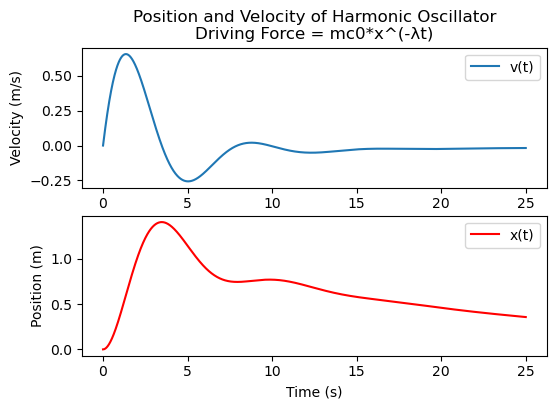

In [51]:
plt.figure(figsize=(6,4))
plt.subplot(211)
plt.plot(t1,x1[:, 1], label="v(t)")
plt.title("Position and Velocity of Harmonic Oscillator\nDriving Force = mc0*x^(-λt)")
plt.ylabel("Velocity (m/s)")
plt.legend()

plt.subplot(212)
plt.plot(t1,x1[:,0], color = "r", label="x(t)")
plt.ylabel("Position (m)")
plt.xlabel("Time (s)")
plt.legend()

plt.show()

# Part b:

In [94]:
#new constants
F0 = 0.800 #N
f = 1.50 #Hz
#f = 0.145 #resonance frequency test
x02 = 0.124 #initial position
v02 = 0 #initial velocity

In [95]:
def force2(t):
    force = F0 * np.cos(2*f*t*np.pi) 
    return force

In [96]:
#define new ODE's as a function
def ode2(x,t): #x is an array of x and v's
    f0=x[1] #1st diff eq
    
    f1=(-k*x[0] -b*x[1] + force2(t))/m
    return np.array([f0,f1]) #return them as an array

In [97]:
#now plug into the rk2 algorithm
t2,x2 = rk2( [x02,v02], 0, 15, 0.01, ode2) 

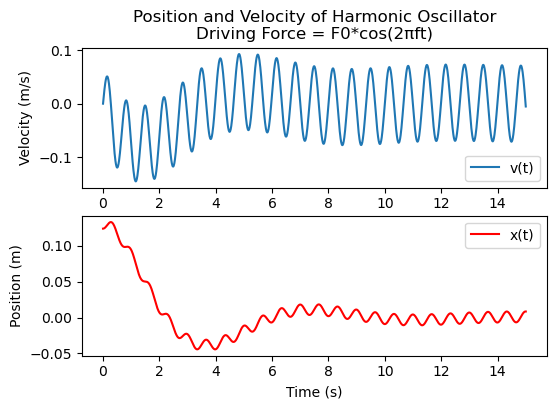

In [98]:
plt.figure(figsize=(6,4))
plt.subplot(211)
plt.plot(t2,x2[:, 1], label="v(t)")
plt.title("Position and Velocity of Harmonic Oscillator\nDriving Force = F0*cos(2πft)")
plt.ylabel("Velocity (m/s)")
plt.legend()

plt.subplot(212)
plt.plot(t2,x2[:,0], color = "r", label="x(t)")
plt.ylabel("Position (m)")
plt.xlabel("Time (s)")
plt.legend()

plt.show()

To reach resonance (where the position is nearly periodic, the amplitude is high, and the frequency of the driving force is the natural frequency of the system), we must decrease f.